**1. IMPORT LIBRARIES**

In [ ]:
from tensorflow import keras
from keras.models import load_model
from keras.preprocessing.image import ImageDataGenerator
import imgaug.augmenters as iaa
import cv2
import os
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf 
from tensorflow.keras import datasets, layers, models

**2. LOAD THE DATASET**

In [ ]:
input_path = '/content/drive/MyDrive/NM/animals/antelope'
output_path = '/content/drive/MyDrive/NM/animals'

**3. DATA AUGMENTATION**

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator,array_to_img, img_to_array, load_img

In [ ]:
datagen = ImageDataGenerator(
        rotation_range = 40,
        shear_range = 0.2,
        zoom_range = 0.2,
        horizontal_flip = True,
        brightness_range = (0.5, 1.5))

In [ ]:
img = load_img('/content/drive/MyDrive/NM/animals/bear/039b2ae790.jpg')

In [ ]:
x = img_to_array(img)

In [ ]:
x

array([[[ 40.,  27.,  18.],
        [ 40.,  27.,  18.],
        [ 40.,  27.,  18.],
        ...,
        [ 70.,  43.,  22.],
        [ 70.,  43.,  22.],
        [ 70.,  43.,  22.]],

       [[ 40.,  27.,  18.],
        [ 40.,  27.,  18.],
        [ 40.,  27.,  18.],
        ...,
        [ 70.,  43.,  22.],
        [ 70.,  43.,  22.],
        [ 70.,  43.,  22.]],

       [[ 40.,  27.,  18.],
        [ 40.,  27.,  18.],
        [ 40.,  27.,  18.],
        ...,
        [ 70.,  43.,  22.],
        [ 70.,  43.,  22.],
        [ 70.,  43.,  22.]],

       ...,

       [[ 65.,  57.,  55.],
        [ 99.,  91.,  89.],
        [136., 126., 125.],
        ...,
        [158., 141., 123.],
        [152., 135., 117.],
        [151., 134., 116.]],

       [[ 97.,  89.,  87.],
        [ 96.,  86.,  85.],
        [104.,  94.,  93.],
        ...,
        [151., 136., 117.],
        [146., 131., 112.],
        [142., 127., 108.]],

       [[ 44.,  34.,  33.],
        [ 52.,  42.,  41.],
        [ 86.,  

In [ ]:
train_datagen=ImageDataGenerator(rescale=1./255,zoom_range=0.2,horizontal_flip=True,vertical_flip=False)

In [ ]:
train_datagen

**4. BUILD THE CNN MODEL**

In [ ]:
# Set the path to your test dataset and train dataset
x = '/content/drive/MyDrive/NM/animals/antelope'
y = '/content/drive/MyDrive/NM/animals/badger'

In [ ]:
# Initialize the model
model = LogisticRegression()

**i) INPUT LAYER**

In [ ]:
model = Sequential()

In [ ]:
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(64, 64, 3)))

**ii) MINIMUM 1 CONVOLUTION & 1 POOLING LAYER**

In [ ]:
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

**iii) ONE FLATTEN LAYER**

In [ ]:
model.add(Flatten())

**iv) MINIMUM 2 HIDDEN LAYERS**

In [ ]:
model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))

**v) OUTPUT LAYER**

In [ ]:
model.add(Dense(10, activation='softmax'))
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 62, 62, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 31, 31, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 29, 29, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 14, 14, 64)       0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 12544)             0         
                                                                 
 dense (Dense)               (None, 128)               1

**5. TEST THE MODEL**

In [ ]:
from tensorflow.keras.utils import load_img, img_to_array 

test_image = load_img('/content/drive/MyDrive/NM/animals/bear/04e5d04320.jpg', target_size = (64, 64))

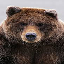

In [ ]:
test_image

In [ ]:
x = img_to_array(test_image)
x = np.expand_dims(x, axis =0)

x.shape

(1, 64, 64, 3)

In [ ]:
pred = np.argmax(model.predict(x), axis = 1)

pred

1/1 [==============================] - 0s 422ms/step


array([6])

In [ ]:
print(pred)

[6]
